In [ ]:
# ================================
# Prefix vs Suffix Trie Stemming
# ================================

# Load dataset
with open("brown_nouns.txt", "r") as f:
    words = [w.strip().lower() for w in f if w.strip()]

# ----------- Trie Implementation -----------

class TrieNode:
    def __init__(self):
        self.children = {}
        self.freq = 0
        self.is_end = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.freq += 1
        node.is_end = True

    def find_split(self, word):
        """Find stem + suffix based on branching (max children)"""
        node = self.root
        stem, suffix = "", ""
        max_branch_point = 0
        max_branch_index = 0

        for i, char in enumerate(word):
            if char in node.children:
                node = node.children[char]
                stem += char
                # branching point = node with more than 1 child
                if len(node.children) > max_branch_point:
                    max_branch_point = len(node.children)
                    max_branch_index = i + 1
            else:
                break

        return word[:max_branch_index], word[max_branch_index:]


# ----------- Build Prefix & Suffix Tries -----------

prefix_trie = Trie()
for w in words:
    prefix_trie.insert(w)

suffix_trie = Trie()
for w in words:
    suffix_trie.insert(w[::-1])


# ----------- Stemming Helpers -----------

def stem_with_prefix_trie(word):
    stem, suffix = prefix_trie.find_split(word)
    return stem, suffix

def stem_with_suffix_trie(word):
    rev_word = word[::-1]
    stem_rev, suffix_rev = suffix_trie.find_split(rev_word)
    return stem_rev[::-1], suffix_rev[::-1]


# ----------- Process All Words & Save Output -----------

output_file = "stemming_results.txt"

with open(output_file, "w") as f:
    for w in words:
        # Prefix Trie
        p_stem, p_suf = stem_with_prefix_trie(w)
        prefix_split = f"{p_stem}+{p_suf}" if p_suf else p_stem

        # Suffix Trie
        s_stem, s_suf = stem_with_suffix_trie(w)
        suffix_split = f"{s_stem}+{s_suf}" if s_suf else s_stem

        # Write to file
        f.write(f"{w} → Prefix: {prefix_split} | Suffix: {suffix_split}\n")

    # Analysis
    prefix_splits = sum(1 for w in words if stem_with_prefix_trie(w)[1] != "")
    suffix_splits = sum(1 for w in words if stem_with_suffix_trie(w)[1] != "")

    f.write("\n=== 📊 Analysis ===\n")
    f.write(f"Prefix Trie produced suffixes for {prefix_splits}/{len(words)} words\n")
    f.write(f"Suffix Trie produced suffixes for {suffix_splits}/{len(words)} words\n")

    if suffix_splits > prefix_splits:
        f.write("✅ Suffix Trie is better for stemming (captures suffixes).\n")
    else:
        f.write("✅ Prefix Trie is better for stemming (captures stems).\n")

print(f"✅ Done! Results saved to {output_file}")


✅ Done! Results saved to stemming_results.txt


Total words: 100878
Unique words: 14335


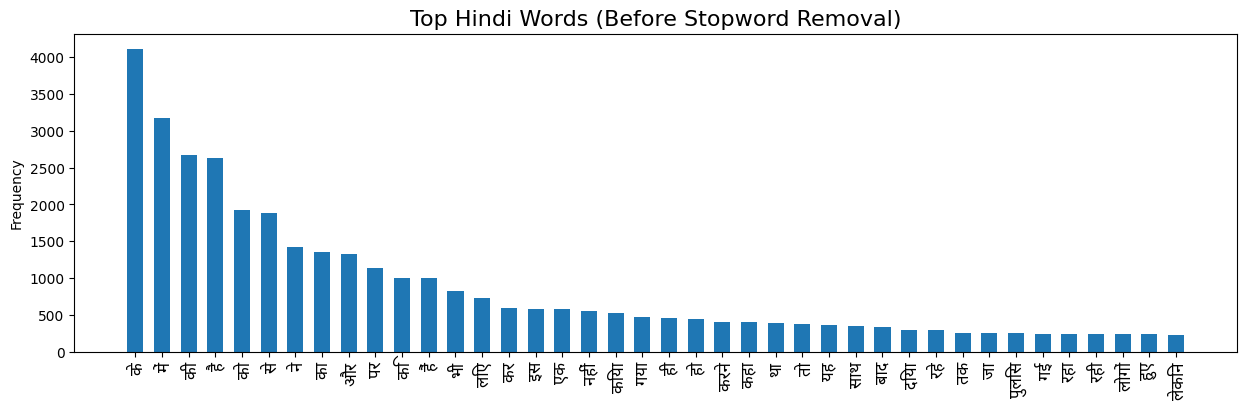

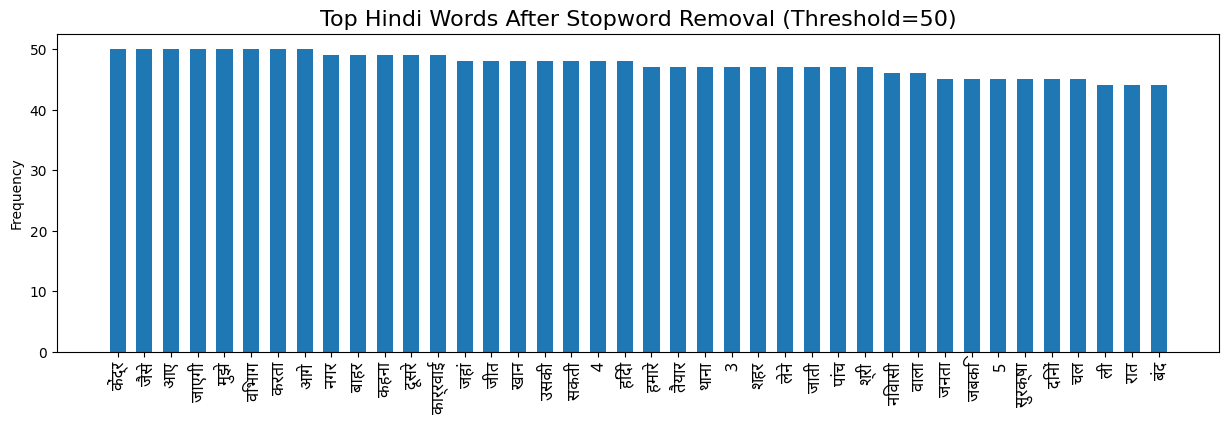

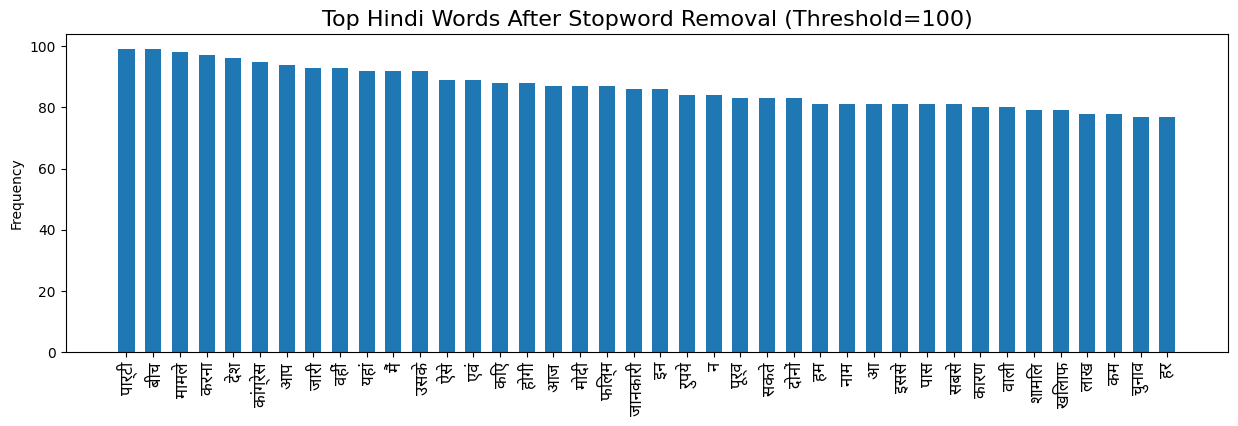

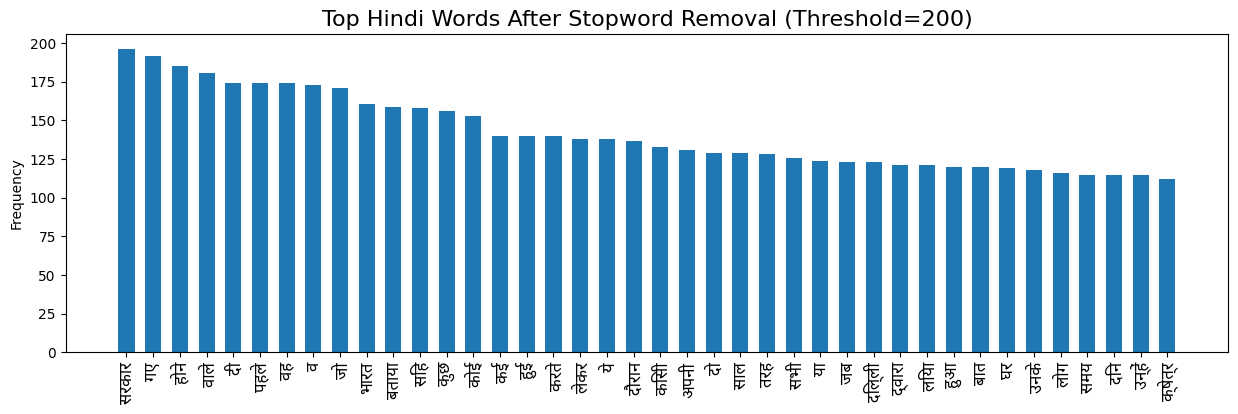

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Load Hindi-supporting font
hindi_font = fm.FontProperties(fname="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf")

# =========================
# 1. Read dataset
# =========================
with open("tokenised_words.txt", "r", encoding="utf-8") as f:
    words = f.read().split()

print("Total words:", len(words))

# =========================
# 2. Word frequency count
# =========================
freq = {}
for w in words:
    freq[w] = freq.get(w, 0) + 1

print("Unique words:", len(freq))

# =========================
# 3. Function for plotting
# =========================
def plot_top_words(word_freq, title, top_n=40):
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    words_top, counts_top = zip(*sorted_freq)

    plt.figure(figsize=(15, 6))
    plt.bar(words_top, counts_top, width=0.6)
    plt.xticks(rotation=90, fontproperties=hindi_font, fontsize=12)
    plt.title(title, fontsize=16)
    plt.ylabel("Frequency")
    plt.subplots_adjust(bottom=0.35)  # extra space at bottom
    plt.show()

# =========================
# 4. Plot before filtering
# =========================
plot_top_words(freq, "Top Hindi Words (Before Stopword Removal)", top_n=40)

# =========================
# 5. Apply thresholds: 50, 100, 200
# =========================
thresholds = [50, 100, 200]

for t in thresholds:
    filtered_freq = {w: c for w, c in freq.items() if c <= t}
    if not filtered_freq:
        print(f"No words left after applying threshold {t}")
        continue

    plot_top_words(filtered_freq, f"Top Hindi Words After Stopword Removal (Threshold={t})", top_n=40)
